In [1]:
import matplotlib.pyplot as plt
import numpy as np
from wrf import to_np, getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
from metpy.plots import colortables
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch
import xarray as xr
from scipy.ndimage import gaussian_filter as gfilt
import matplotlib as mpl
import matplotlib.pylab as pl
from scipy.interpolate import interp1d
import matplotlib
from matplotlib.lines import Line2D

In [2]:
data=xr.open_dataset('/glade/scratch/molina/perturb_results_v2.nc')

colors = pl.cm.magma_r(np.linspace(0,1,len(data.thresholds)))

#the control run
wrf_control_orig_0 = 'wrf4km_ens_2'

wrf_gombasn_cool_1 = 'wrf4km_sst_gombasin_cool_1'
wrf_gombasn_cool_2 = 'wrf4km_sst_gombasin_cool_2'
wrf_gomplum_cool_1 = 'wrf4km_sst_gomplume_cool_1'
wrf_gomplum_cool_2 = 'wrf4km_sst_gomplume_cool_2'
wrf_murgion_cool_1 = 'wrf4km_sst_muregion_cool_1'
wrf_murgion_cool_2 = 'wrf4km_sst_muregion_cool_2'

wrf_gombasn_warm_1 = 'wrf4km_sst_gombasin_warm_1'
wrf_gombasn_warm_2 = 'wrf4km_sst_gombasin_warm_2'
wrf_gomplum_warm_1 = 'wrf4km_sst_gomplume_warm_1'
wrf_gomplum_warm_2 = 'wrf4km_sst_gomplume_warm_2'
wrf_murgion_warm_1 = 'wrf4km_sst_muregion_warm_1'
wrf_murgion_warm_2 = 'wrf4km_sst_muregion_warm_2'

UH_thresholds = np.array([60])

mask_data = xr.open_dataset('/glade/work/molina/DATA/usstates_shapefiles/conus_mask_res_80.nc')


def percent_change(data1,data2,data_mask):
   
    return np.divide((data1.UH_dates.where(data_mask.conus.values, 0).sum()-
                       data2.UH_dates.where(data_mask.conus.values, 0).sum()),
                       data2.UH_dates.where(data_mask.conus.values, 0).sum())*100


def percent_change_scalar(data1,data2):
   
    return np.divide((data1-data2),data2)*100

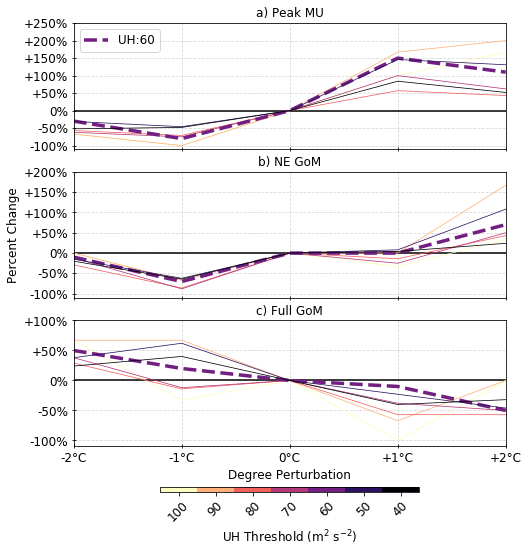

In [3]:
plt.close()

timeint = 0


UH_thresholds = np.array([100,90,80,70,60,50,40])


fig = plt.figure(figsize=(6.,7.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

for n, UH_threshold in enumerate(UH_thresholds):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion1c,0.,murgion1w,murgion2w])
    gompl = np.array([gomplum2c,gomplum1c,0.,gomplum1w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn1c,0.,gombasn1w,gombasn2w])

    x_smooth=np.linspace(0, 4, 10000)
    

    #fig.suptitle('Perturbed SST Changes to Severe Convective Activity (21 Jan 9-21UTC)', y=1.0, fontsize=12)


    ###############################################################################


    if UH_threshold == 60:
        #f=interp1d(data.x.values, mureg, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax1.plot(x_smooth, y_smooth, c=colors[n],lw=3.5,ls='--')
        ax1.plot(data.x.values, mureg, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        
    else:
        #f=interp1d(data.x.values, mureg, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax1.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        ax1.plot(data.x.values, mureg, c=colors[n],lw=0.75)
        

    if UH_threshold == 60:
        #f=interp1d(data.x.values, gompl, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax2.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')
        ax2.plot(data.x.values, gompl,c=colors[n],lw=3.5,ls='--')
        
    else:
        #f=interp1d(data.x.values, gompl, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax2.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        ax2.plot(data.x.values, gompl, c=colors[n],lw=0.75)
        
    if UH_threshold == 60:
        #f=interp1d(data.x.values, gombs, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax3.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--') 
        ax3.plot(data.x.values, gombs,c=colors[n],lw=3.5,ls='--') 
        
    else:
        #f=interp1d(data.x.values, gombs, kind='cubic')
        #y_smooth=f(x_smooth)
        #ax3.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        ax3.plot(data.x.values, gombs, c=colors[n],lw=0.75)
        

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 250)
    ax2.set_ylim(-110, 200)
    ax3.set_ylim(-110, 100)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('a) Peak MU', fontsize=12)
    ax2.set_title('b) NE GoM', fontsize=12)
    ax3.set_title('c) Full GoM', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0,1,2,3,4])
    ax1.set_xticklabels(['-2','-1','0','+1','+2'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,-50,0,50,100,150,200,250])
    ax1.set_yticklabels(['-100%','-50%','0%','+50%','+100%','+150%','+200%','+250%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0,1,2,3,4])
    ax2.set_xticklabels(['-2','-1','0','+1','+2'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,-50,0,50,100,150,200])
    ax2.set_yticklabels(['-100%','-50%','0%','+50%','+100%','+150%','+200%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0,1,2,3,4])
    ax3.set_xticklabels(['-2'+a+'C','-1'+a+'C','0'+a+'C','+1'+a+'C','+2'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,-50,0,50,100])
    ax3.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    
    
import matplotlib as mpl
cmap = plt.cm.get_cmap('magma_r', len(data.thresholds))

norm = mpl.colors.Normalize(vmin=0, vmax=7)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH Threshold (m$^{2}$ s$^{-2}$)', fontsize=12)

labels = np.arange(0,8,1)
loc    = labels + .5
cb1.set_ticks(loc)

cb1.ax.set_xticklabels(list(['100','90',
                                 '80','70',
                                 '60','50',
                                 '40']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60"],
           loc="upper left",
           fancybox=True, fontsize=12)


ax1.hlines(0, 0, 4, colors='k', linestyles='solid')
ax2.hlines(0, 0, 4, colors='k', linestyles='solid')
ax3.hlines(0, 0, 4, colors='k', linestyles='solid')


#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig9.png', bbox_inches='tight', dpi=1200)
#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig9_lowdpi.png', bbox_inches='tight', dpi=200)
plt.show()

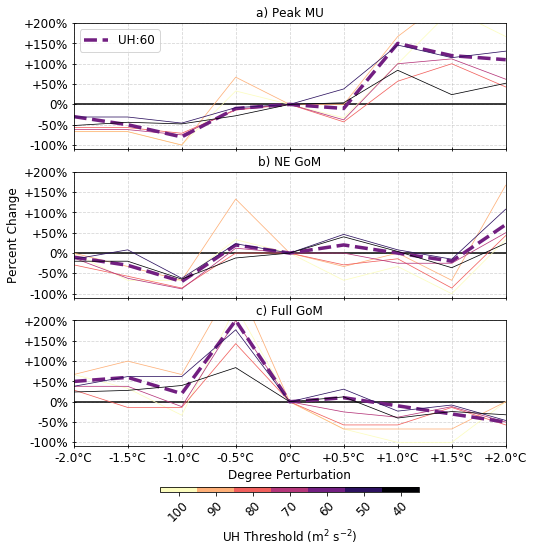

In [14]:
plt.close()

timeint = 0


UH_thresholds = np.array([100,90,80,70,60,50,40])


fig = plt.figure(figsize=(6.,7.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

for n, UH_threshold in enumerate(UH_thresholds):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    gombasn_cool_05=xr.open_dataset('/glade/scratch/molina/WRF10/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_05 = np.where(mask_data.conus.values,gombasn_cool_05.where(gombasn_cool_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_15=xr.open_dataset('/glade/scratch/molina/WRF9/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_15 = np.where(mask_data.conus.values,gombasn_cool_15.where(gombasn_cool_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    

    gomplum_cool_05=xr.open_dataset('/glade/scratch/molina/WRF6/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_05 = np.where(mask_data.conus.values,gomplum_cool_05.where(gomplum_cool_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_15=xr.open_dataset('/glade/scratch/molina/WRF5/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_15 = np.where(mask_data.conus.values,gomplum_cool_15.where(gomplum_cool_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    
    murgion_cool_05=xr.open_dataset('/glade/scratch/molina/WRF2/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_05 = np.where(mask_data.conus.values,murgion_cool_05.where(murgion_cool_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_15=xr.open_dataset('/glade/scratch/molina/WRF1/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_15 = np.where(mask_data.conus.values,murgion_cool_15.where(murgion_cool_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    

    gombasn_warm_05=xr.open_dataset('/glade/scratch/molina/WRF11/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_05 = np.where(mask_data.conus.values,gombasn_warm_05.where(gombasn_warm_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_15=xr.open_dataset('/glade/scratch/molina/WRF12/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_15 = np.where(mask_data.conus.values,gombasn_warm_15.where(gombasn_warm_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    
    gomplum_warm_05=xr.open_dataset('/glade/scratch/molina/WRF7/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_05 = np.where(mask_data.conus.values,gomplum_warm_05.where(gomplum_warm_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_15=xr.open_dataset('/glade/scratch/molina/WRF8/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_15 = np.where(mask_data.conus.values,gomplum_warm_15.where(gomplum_warm_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    
    murgion_warm_05=xr.open_dataset('/glade/scratch/molina/WRF3/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_05 = np.where(mask_data.conus.values,murgion_warm_05.where(murgion_warm_05.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_15=xr.open_dataset('/glade/scratch/molina/WRF4/WRF/run/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_15 = np.where(mask_data.conus.values,murgion_warm_15.where(murgion_warm_15.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    
    
    murgion05c = round(percent_change_scalar(new_murgion_cool_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion15c = round(percent_change_scalar(new_murgion_cool_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    gomplum05c = round(percent_change_scalar(new_gomplum_cool_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum15c = round(percent_change_scalar(new_gomplum_cool_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    gombasn05c = round(percent_change_scalar(new_gombasn_cool_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn15c = round(percent_change_scalar(new_gombasn_cool_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    murgion05w = round(percent_change_scalar(new_murgion_warm_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion15w = round(percent_change_scalar(new_murgion_warm_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    gomplum05w = round(percent_change_scalar(new_gomplum_warm_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum15w = round(percent_change_scalar(new_gomplum_warm_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    gombasn05w = round(percent_change_scalar(new_gombasn_warm_05[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn15w = round(percent_change_scalar(new_gombasn_warm_15[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion15c,murgion1c,murgion05c,0.,murgion05w,murgion1w,murgion15w,murgion2w])
    gompl = np.array([gomplum2c,gomplum15c,gomplum1c,gomplum05c,0.,gomplum05w,gomplum1w,gomplum15w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn15c,gombasn1c,gombasn05c,0.,gombasn05w,gombasn1w,gombasn15w,gombasn2w])

    
    #x_smooth=np.linspace(0, 4, 10000)
    


    ###############################################################################


    if UH_threshold == 60:
        ax1.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), mureg, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        
    else:
        ax1.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), mureg, c=colors[n],lw=0.75)
        

    if UH_threshold == 60:
        ax2.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), gompl,c=colors[n],lw=3.5,ls='--')
        
    else:
        ax2.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), gompl, c=colors[n],lw=0.75)
        
    if UH_threshold == 60:
        ax3.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), gombs,c=colors[n],lw=3.5,ls='--') 
        
    else:
        ax3.plot(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]), gombs, c=colors[n],lw=0.75)
        

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 200)
    ax2.set_ylim(-110, 200)
    ax3.set_ylim(-110, 100)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('a) Peak MU', fontsize=12)
    ax2.set_title('b) NE GoM', fontsize=12)
    ax3.set_title('c) Full GoM', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax1.set_xticklabels(['-2.0','-1.5','-1.0','-0.5','0','+0.5','+1.0','+1.5','+2.0'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,-50,0,50,100,150,200])
    ax1.set_yticklabels(['-100%','-50%','0%','+50%','+100%','+150%','+200%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax2.set_xticklabels(['-2.0','-1.5','-1.0','-0.5','0','+0.5','+1.0','+1.5','+2.0'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,-50,0,50,100,150,200])
    ax2.set_yticklabels(['-100%','-50%','0%','+50%','+100%','+150%','+200%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax3.set_xticklabels(['-2.0'+a+'C','-1.5'+a+'C','-1.0'+a+'C','-0.5'+a+'C','0'+a+'C',
                         '+0.5'+a+'C','+1.0'+a+'C','+1.5'+a+'C','+2.0'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,-50,0,50,100,150,200])
    ax3.set_yticklabels(['-100%','-50%','0%','+50%','+100%','+150%','+200%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    
    
import matplotlib as mpl
cmap = plt.cm.get_cmap('magma_r', len(data.thresholds))

norm = mpl.colors.Normalize(vmin=0, vmax=7)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH Threshold (m$^{2}$ s$^{-2}$)', fontsize=12)

labels = np.arange(0,8,1)
loc    = labels + .5
cb1.set_ticks(loc)

cb1.ax.set_xticklabels(list(['100','90','80','70','60','50','40']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60"],
           loc="upper left",
           fancybox=True, fontsize=12)


ax1.hlines(0, 0, 8, colors='k', linestyles='solid')
ax2.hlines(0, 0, 8, colors='k', linestyles='solid')
ax3.hlines(0, 0, 8, colors='k', linestyles='solid')


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig9.png', bbox_inches='tight', dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig9_lowdpi.png', bbox_inches='tight', dpi=200)
plt.show()

In [4]:
murgion15w

24.0

In [5]:
murgion05w

4.0

In [7]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize=(6.,7.))
cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

cmap = plt.cm.get_cmap('magma_r', len(data.thresholds))

norm = mpl.colors.Normalize(vmin=0, vmax=7)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH Threshold (m$^{2}$ s$^{-2}$)', fontsize=12)

labels = np.arange(0,8,1)
loc    = labels + .5
cb1.set_ticks(loc)

cb1.ax.set_xticklabels(list(['100','90',
                                 '80','70',
                                 '60','50',
                                 '40']),rotation=45)

cb1.ax.tick_params(labelsize=12)

plt.show()

In [5]:
data.threshold

<xarray.DataArray 'threshold' (thresholds: 7)>
array(['UH_100', 'UH_90', 'UH_80', 'UH_70', 'UH_60', 'UH_50', 'UH_40'],
      dtype=object)
Coordinates:
    threshold  (thresholds) object 'UH_100' 'UH_90' 'UH_80' ... 'UH_50' 'UH_40'
Dimensions without coordinates: thresholds

IndexError: index 7 is out of bounds for axis 0 with size 7

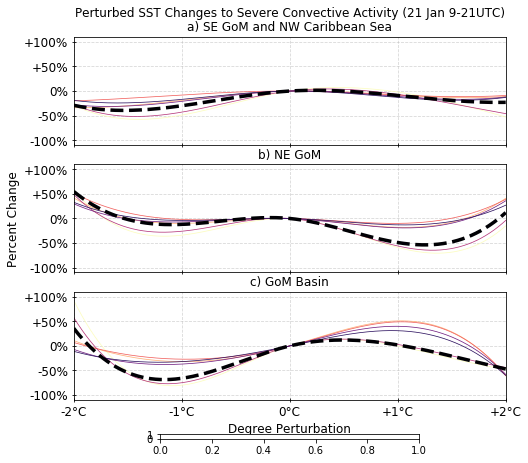

In [15]:
plt.close()

timeint = 2


UH_thresholds = np.array([100,100,100,80,80,80,60,60,60,40,40,40])


fig = plt.figure(figsize=(6.,6.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

for n, (UH_threshold, dbz_threshold) in enumerate(zip(UH_thresholds, dbz_thresholds)):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion1c,0.,murgion1w,murgion2w])
    gompl = np.array([gomplum2c,gomplum1c,0.,gomplum1w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn1c,0.,gombasn1w,gombasn2w])

    x_smooth=np.linspace(0, 4, 10000)
    

    fig.suptitle('Perturbed SST Changes to Severe Convective Activity (21 Jan 9-21UTC)', y=1.0, fontsize=12)


    ###############################################################################


    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        #ax1.plot(data.x,data.muregion_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax1.plot(data.x, data.muregion_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')
        #ax2.plot(data.x,data.gomplume_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax2.plot(data.x,data.gomplume_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')        
        #ax3.plot(data.x,data.gombasin_per[i],c='k',lw=2.5,ls='--')        
    else:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax3.plot(data.x,data.gombasin_per[i], c=colors[n])

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 110)
    ax2.set_ylim(-110, 110)
    ax3.set_ylim(-110, 110)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('a) SE GoM and NW Caribbean Sea', fontsize=12)
    ax2.set_title('b) NE GoM', fontsize=12)
    ax3.set_title('c) GoM Basin', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0,1,2,3,4])
    ax1.set_xticklabels(['-2','-1','0','+1','+2'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,-50,0,50,100])
    ax1.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0,1,2,3,4])
    ax2.set_xticklabels(['-2','-1','0','+1','+2'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,-50,0,50,100])
    ax2.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0,1,2,3,4])
    ax3.set_xticklabels(['-2'+a+'C','-1'+a+'C','0'+a+'C','+1'+a+'C','+2'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,-50,0,50,100])
    ax3.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)


import matplotlib as mpl
cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=0, vmax=11)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH-dBZ', fontsize=12)

cb1.ax.set_xticklabels(list(['100-50','100-40','100-30',
                                 '80-50','80-40','80-30',
                                 '60-50','60-40','60-30',
                                 '40-50','40-40','40-30']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60, dBZ:50"],
           loc="upper left",
           fancybox=True, fontsize=12)


#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig10_12h_'+str(timeint-1)+'.png', bbox_inches='tight', dpi=1200)
plt.show()

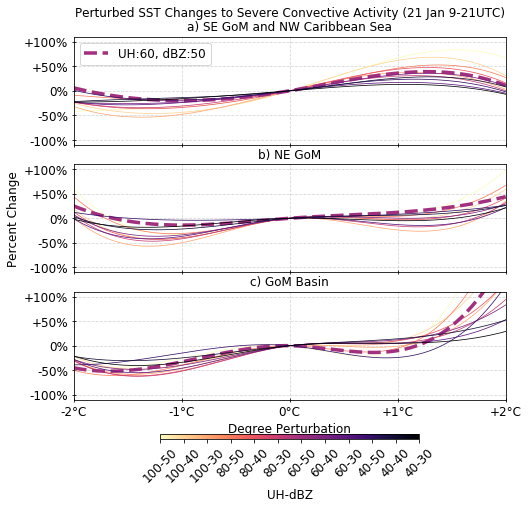

In [12]:
plt.close()

timeint = 3


UH_thresholds = np.array([100,100,100,80,80,80,60,60,60,40,40,40])
dbz_thresholds = np.array([50,40,30,50,40,30,50,40,30,50,40,30])


fig = plt.figure(figsize=(6.,6.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

for n, (UH_threshold, dbz_threshold) in enumerate(zip(UH_thresholds, dbz_thresholds)):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion1c,0.,murgion1w,murgion2w])
    gompl = np.array([gomplum2c,gomplum1c,0.,gomplum1w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn1c,0.,gombasn1w,gombasn2w])

    x_smooth=np.linspace(0, 4, 10000)
    

    fig.suptitle('Perturbed SST Changes to Severe Convective Activity (21 Jan 9-21UTC)', y=1.0, fontsize=12)


    ###############################################################################


    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        #ax1.plot(data.x,data.muregion_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax1.plot(data.x, data.muregion_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')
        #ax2.plot(data.x,data.gomplume_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax2.plot(data.x,data.gomplume_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')        
        #ax3.plot(data.x,data.gombasin_per[i],c='k',lw=2.5,ls='--')        
    else:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax3.plot(data.x,data.gombasin_per[i], c=colors[n])

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 110)
    ax2.set_ylim(-110, 110)
    ax3.set_ylim(-110, 110)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('a) SE GoM and NW Caribbean Sea', fontsize=12)
    ax2.set_title('b) NE GoM', fontsize=12)
    ax3.set_title('c) GoM Basin', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0,1,2,3,4])
    ax1.set_xticklabels(['-2','-1','0','+1','+2'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,-50,0,50,100])
    ax1.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0,1,2,3,4])
    ax2.set_xticklabels(['-2','-1','0','+1','+2'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,-50,0,50,100])
    ax2.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0,1,2,3,4])
    ax3.set_xticklabels(['-2'+a+'C','-1'+a+'C','0'+a+'C','+1'+a+'C','+2'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,-50,0,50,100])
    ax3.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)


import matplotlib as mpl
cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=0, vmax=11)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH-dBZ', fontsize=12)

cb1.ax.set_xticklabels(list(['100-50','100-40','100-30',
                                 '80-50','80-40','80-30',
                                 '60-50','60-40','60-30',
                                 '40-50','40-40','40-30']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60, dBZ:50"],
           loc="upper left",
           fancybox=True, fontsize=12)


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig10_12h_'+str(timeint-1)+'.png', bbox_inches='tight', dpi=1200)
plt.show()

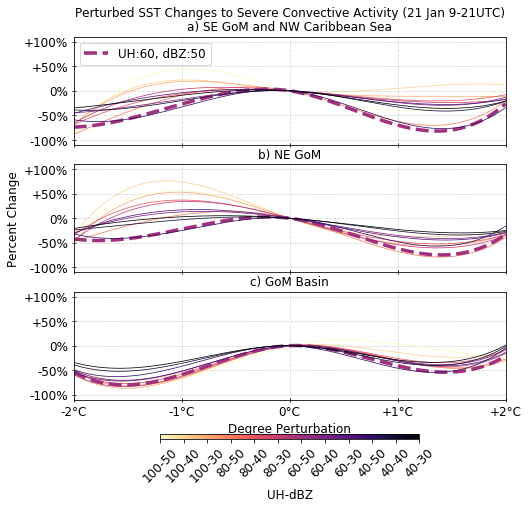

In [13]:
plt.close()

timeint = 4


UH_thresholds = np.array([100,100,100,80,80,80,60,60,60,40,40,40])
dbz_thresholds = np.array([50,40,30,50,40,30,50,40,30,50,40,30])


fig = plt.figure(figsize=(6.,6.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.01])

for n, (UH_threshold, dbz_threshold) in enumerate(zip(UH_thresholds, dbz_thresholds)):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint-1:timeint,:,:].sum(),new_control_orig_0[timeint-1:timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion1c,0.,murgion1w,murgion2w])
    gompl = np.array([gomplum2c,gomplum1c,0.,gomplum1w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn1c,0.,gombasn1w,gombasn2w])

    x_smooth=np.linspace(0, 4, 10000)
    

    fig.suptitle('Perturbed SST Changes to Severe Convective Activity (21 Jan 9-21UTC)', y=1.0, fontsize=12)


    ###############################################################################


    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        #ax1.plot(data.x,data.muregion_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax1.plot(data.x, data.muregion_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')
        #ax2.plot(data.x,data.gomplume_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax2.plot(data.x,data.gomplume_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')        
        #ax3.plot(data.x,data.gombasin_per[i],c='k',lw=2.5,ls='--')        
    else:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax3.plot(data.x,data.gombasin_per[i], c=colors[n])

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 110)
    ax2.set_ylim(-110, 110)
    ax3.set_ylim(-110, 110)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('a) SE GoM and NW Caribbean Sea', fontsize=12)
    ax2.set_title('b) NE GoM', fontsize=12)
    ax3.set_title('c) GoM Basin', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0,1,2,3,4])
    ax1.set_xticklabels(['-2','-1','0','+1','+2'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,-50,0,50,100])
    ax1.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0,1,2,3,4])
    ax2.set_xticklabels(['-2','-1','0','+1','+2'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,-50,0,50,100])
    ax2.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0,1,2,3,4])
    ax3.set_xticklabels(['-2'+a+'C','-1'+a+'C','0'+a+'C','+1'+a+'C','+2'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,-50,0,50,100])
    ax3.set_yticklabels(['-100%','-50%','0%','+50%','+100%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)


import matplotlib as mpl
cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=0, vmax=11)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH-dBZ', fontsize=12)

cb1.ax.set_xticklabels(list(['100-50','100-40','100-30',
                                 '80-50','80-40','80-30',
                                 '60-50','60-40','60-30',
                                 '40-50','40-40','40-30']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60, dBZ:50"],
           loc="upper left",
           fancybox=True, fontsize=12)


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig10_12h_'+str(timeint-1)+'.png', bbox_inches='tight', dpi=1200)
plt.show()

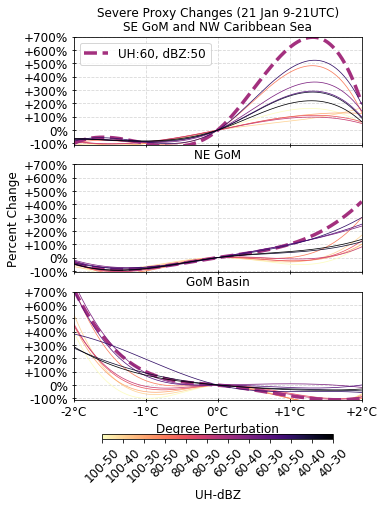

In [49]:
plt.close()

timeint = 0


UH_thresholds = np.array([100,100,100,80,80,80,60,60,60,40,40,40])
dbz_thresholds = np.array([50,40,30,50,40,30,50,40,30,50,40,30])


fig = plt.figure(figsize=(4.,6.))

ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

cbar_ax = fig.add_axes([0.1, 0.0, 0.8, 0.01])

for n, (UH_threshold, dbz_threshold) in enumerate(zip(UH_thresholds, dbz_thresholds)):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_cool_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gombasn_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_gomplum_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_1+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/WRF_HYSPLIT_proj/'+wrf_murgion_warm_2+'/ver_grid_80_UH_'+str(UH_threshold)+'_Z_'+str(dbz_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.UHdbz_dates.resample(time='12H',base=9).sum('time'),0)

    
    murgion1c = round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2c = round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1c = round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2c = round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1c = round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2c = round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion1w = round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    murgion2w = round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum1w = round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gomplum2w = round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn1w = round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    gombasn2w = round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
    
    
    mureg = np.array([murgion2c,murgion1c,0.,murgion1w,murgion2w])
    gompl = np.array([gomplum2c,gomplum1c,0.,gomplum1w,gomplum2w])
    gombs = np.array([gombasn2c,gombasn1c,0.,gombasn1w,gombasn2w])

    x_smooth=np.linspace(0, 4, 10000)
    

    fig.suptitle('Severe Proxy Changes (21 Jan 9-21UTC)', y=1.0, fontsize=12)


    ###############################################################################


    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=3.5,ls='--')
        custom_line = [Line2D([0], [0], color=colors[n], linestyle='--', linewidth=3.5)]
        #ax1.plot(data.x,data.muregion_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, mureg, kind='cubic')
        y_smooth=f(x_smooth)
        ax1.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax1.plot(data.x, data.muregion_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')
        #ax2.plot(data.x,data.gomplume_per[i],c='k',lw=2.5,ls='--')
    else:
        f=interp1d(data.x.values, gompl, kind='cubic')
        y_smooth=f(x_smooth)
        ax2.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax2.plot(data.x,data.gomplume_per[i], c=colors[n])

    if UH_threshold == 60 and dbz_threshold == 50:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth,c=colors[n],lw=3.5,ls='--')        
        #ax3.plot(data.x,data.gombasin_per[i],c='k',lw=2.5,ls='--')        
    else:
        f=interp1d(data.x.values, gombs, kind='cubic')
        y_smooth=f(x_smooth)
        ax3.plot(x_smooth, y_smooth, c=colors[n],lw=0.75)
        #ax3.plot(data.x,data.gombasin_per[i], c=colors[n])

    ax1.margins(x=0, y=0, tight=None)
    ax2.margins(x=0, y=0, tight=None)
    ax3.margins(x=0, y=0, tight=None)

    ax1.set_ylim(-110, 700)
    ax2.set_ylim(-110, 700)
    ax3.set_ylim(-110, 700)

    ax1.grid(True, linestyle='--', alpha=0.5)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax3.grid(True, linestyle='--', alpha=0.5)

    ax1.set_title('SE GoM and NW Caribbean Sea', fontsize=12)
    ax2.set_title('NE GoM', fontsize=12)
    ax3.set_title('GoM Basin', fontsize=12)

    a = u"\u00b0"
    ax3.set_xlabel('Degree Perturbation', fontsize=12)
    ax2.set_ylabel('Percent Change', fontsize=12)

    ax1.set_xticks([0,1,2,3,4])
    ax1.set_xticklabels(['-2','-1','0','+1','+2'])
    ax1.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax1.set_yticks([-100,0,100,200,300,400,500,600,700])
    ax1.set_yticklabels(['-100%','0%','+100%','+200%','+300%','+400%','+500%','+600%','+700%'], fontsize=12)
    ax1.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax2.set_xticks([0,1,2,3,4])
    ax2.set_xticklabels(['-2','-1','0','+1','+2'])
    ax2.tick_params(axis='x', direction='inout', bottom=True, labelbottom=False)

    ax2.set_yticks([-100,0,100,200,300,400,500,600,700])
    ax2.set_yticklabels(['-100%','0%','+100%','+200%','+300%','+400%','+500%','+600%','+700%'], fontsize=12)
    ax2.tick_params(axis='y', direction='inout', left=True, labelleft=True)

    ax3.set_xticks([0,1,2,3,4])
    ax3.set_xticklabels(['-2'+a+'C','-1'+a+'C','0'+a+'C','+1'+a+'C','+2'+a+'C'], fontsize=12)
    ax3.tick_params(axis='x', direction='inout', bottom=True, labelbottom=True)

    ax3.set_yticks([-100,0,100,200,300,400,500,600,700])
    ax3.set_yticklabels(['-100%','0%','+100%','+200%','+300%','+400%','+500%','+600%','+700%'], fontsize=12)
    ax3.tick_params(axis='y', direction='inout', left=True, labelleft=True)


cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=0, vmax=11)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=data.thresholds)

cb1.set_label('UH-dBZ', fontsize=12)

cb1.ax.set_xticklabels(list(['100-50','100-40','100-30',
                                 '80-50','80-40','80-30',
                                 '60-50','60-40','60-30',
                                 '40-50','40-40','40-30']),rotation=45)

cb1.ax.tick_params(labelsize=12)


ax1.legend([custom_line[0]],
           [u"UH:60, dBZ:50"],
           loc="upper left",
           fancybox=True, fontsize=12)


plt.savefig('/glade/work/molina/DATA/temp_figs/ecss2019_fig4_12h_'+str(timeint)+'.png', bbox_inches='tight', dpi=1200)
plt.show()

array('UH_40_Z_30', dtype='<U10')

In [14]:
print('First 12-h')
timeint = 0
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

First 12-h
 
MU -1:  -100.0
MU -2:  -100.0
PL -1:  -80.0
PL -2:  -40.0
BS -1:  100.0
BS -2:  720.0
 
MU +1:  620.0
MU +2:  200.0
PL +1:  100.0
PL +2:  420.0
BS +1:  -80.0
BS +2:  -100.0
